In [2]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from openslide import OpenSlide

OSError: libopenslide.so.0: cannot open shared object file: No such file or directory

In [3]:
import os
import time
from pprint import pprint
import sys
sys.path.insert(0,'/home/rubenh/xml-pathology')
import numpy as np
from matplotlib import pyplot as plt

from xmlpathology.batchgenerator.utils import create_data_source
from xmlpathology.batchgenerator.generators import BatchGeneratorVanilla

failed to import MultiResolutionImage


OSError: libopenslide.so.0: cannot open shared object file: No such file or directory

In [3]:
data_folder = '/home/mart/Desktop/camelyon16/'

In [4]:
datasource = create_data_source(data_folder=data_folder,
                                images_extension='.tif',
                                annotations_extension='.xml',
                                mode='training')

In [5]:
datasource

{'training': [{'image_path': '/home/mart/Desktop/camelyon16/tumor_091.tif',
   'annotation_path': '/home/mart/Desktop/camelyon16/tumor_091.xml'}]}

In [6]:
label_map = {'_0': 1, '_2': 2}

In [16]:
batchgen = BatchGeneratorVanilla(data_sources=datasource,
                                 label_map=label_map,
                                 batch_size=1,
                                 input_shape=[8000,8000,3],
                                 log_path='/home/mart/logging_output/logtest/')
batchgen.start()

print(batchgen.datasets['training'].counts_per_image)
print(batchgen.datasets['training'].counts_per_label)

{'/home/mart/Desktop/camelyon16/tumor_091.tif': 7}
{'_0': 6, '_2': 1}


In [17]:
batch = batchgen.batch('training')
print(f'batch keys: {batch.keys()}')
print(f'x_batch shape: {batch["x_batch"].shape}')
print(f'y_batch shape {batch["y_batch"].shape}')

batch keys: dict_keys(['x_batch', 'y_batch', 'auxiliaries'])
x_batch shape: (1, 8000, 8000, 3)
y_batch shape (1, 8000, 8000)


In [ ]:
# plot patch and mask
batch_index = 0
patch = batch['x_batch'][batch_index]
mask = batch['y_batch'][batch_index]
plt.imshow(patch)
plt.show()
plt.imshow(mask)
plt.title(np.unique(mask, return_counts=True))
plt.show()

In [10]:
batchgen.stop()

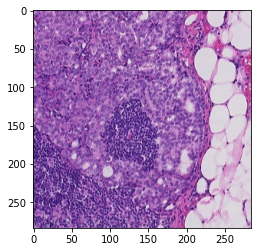

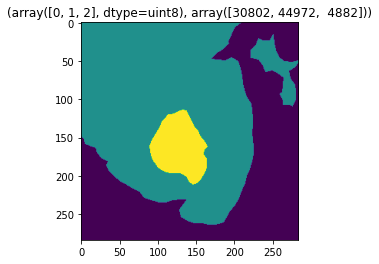

In [11]:
batchgen = BatchGeneratorVanilla(data_sources=datasource,
                                 label_map=label_map,
                                 batch_size=2,
                                 input_shape=[284,284,3],
                                 spacing=2.0,
                                 log_path='/home/mart/logging_output/logtest2/')
batchgen.start()
batch = batchgen.batch('training')
batch_index = 0
patch = batch['x_batch'][batch_index]
mask = batch['y_batch'][batch_index]
plt.imshow(patch)
plt.show()
plt.imshow(mask)
plt.title(np.unique(mask, return_counts=True))
plt.show()
batchgen.stop()

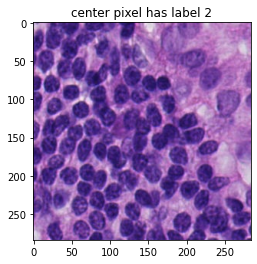

In [12]:
batchgen = BatchGeneratorVanilla(data_sources=datasource,
                                 label_map=label_map,
                                 batch_size=2,
                                 input_shape=[284,284,3],
                                 spacing=0.25,
                                 task='classification',
                                 log_path='/home/mart/logging_output/logtest3/')
batchgen.start()
batch = batchgen.batch('training')
batch_index = 0
patch = batch['x_batch'][batch_index]
label = batch['y_batch'][batch_index]
plt.imshow(patch)
plt.title(f'center pixel has label {label}')
plt.show()
batchgen.stop()

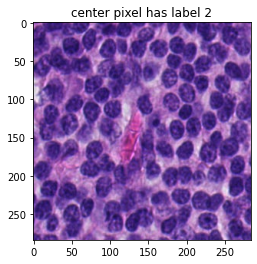

In [15]:
from xmlpathology.batchgenerator.generators import BatchGenerator
from xmlpathology.batchgenerator.core.samplers import LabelSamplerLoader, PointSamplerLoader, SamplerLoader
from xmlpathology.batchgenerator.core.samplers import ClassificationLabelSampler, CenterPointSampler, Sampler

batchgen = BatchGenerator(data_sources=datasource,
                          label_map=label_map,
                          batch_size=2,
                          sampler_loader=SamplerLoader(class_=Sampler, input_shapes=[(284, 284, 3)], spacings=[0.25]), 
                          point_sampler_loader=PointSamplerLoader(class_=CenterPointSampler),
                          label_sampler_loader=LabelSamplerLoader(class_=ClassificationLabelSampler),
                          log_path='/home/mart/logging_output/logtest_/')
batchgen.start()
batch = batchgen.batch('training')
batch_index = 0
patch = batch['x_batch'][batch_index]
label = batch['y_batch'][batch_index]
plt.imshow(patch)
plt.title(f'center pixel has label {label}')
plt.show()
batchgen.stop()

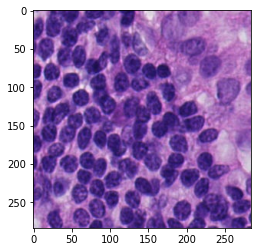

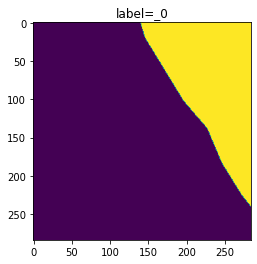

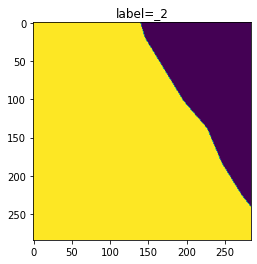

In [14]:
from xmlpathology.batchgenerator.generators import BatchGenerator
from xmlpathology.batchgenerator.core.samplers import LabelSamplerLoader, SamplerLoader
from xmlpathology.batchgenerator.core.samplers import SegmentationLabelSampler, Sampler
from xmlpathology.batchgenerator.callbacks import OneHotEncoding

batchgen = BatchGenerator(data_sources=datasource,
                          label_map=label_map,
                          batch_size=2,
                          sampler_loader=SamplerLoader(class_=Sampler, input_shapes=[(284, 284, 3)], spacings=[0.25, 4.0]), 
                          label_sampler_loader=LabelSamplerLoader(class_=SegmentationLabelSampler),
                          log_path='/home/mart/logging_output/logtest4/',
                          sample_callbacks=[OneHotEncoding()])
batchgen.start()
batch = batchgen.batch('training')
batch_index = 0
patch = batch['x_batch'][batch_index]
mask = batch['y_batch'][batch_index]


plt.imshow(patch)
plt.show()
for i, label in enumerate(label_map):
    plt.imshow(mask[..., i])
    plt.title(f'label={label}')
    plt.show()
batchgen.stop()